<a href="https://colab.research.google.com/github/ASEBRIYfatima/Virus7/blob/main/Re%CC%81gression_line%CC%81aire_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#craetion  base de donnée

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [ ]:
n_observations=100
x,y=make_regression(n_samples=n_observations,n_features=1, noise=10)
#//n_sample==nbr d'observation
#y=y.reshape(n_observations,1)
y=y.reshape(len(y),1)
#//verifier les dimansion
print(np.shape(x))
print(y.shape)

(100, 1)
(100, 1)


Visualisation

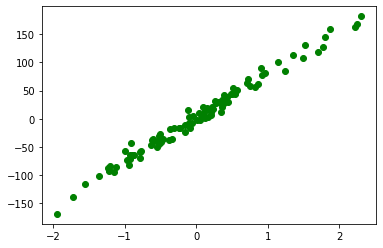

In [ ]:
plt.scatter(x,y,c='g')
plt.show()

Modele


y_p=b0+b1*x

Y_p=X*B.T

In [ ]:
X=np.hstack((x,np.ones((len(x),1))))
X

array([[-0.54816131,  1.        ],
       [ 0.0949605 ,  1.        ],
       [-1.23226683,  1.        ],
       [ 1.49381017,  1.        ],
       [ 1.80516474,  1.        ],
       [ 0.20725757,  1.        ],
       [-1.15150079,  1.        ],
       [ 0.51069051,  1.        ],
       [-0.77752168,  1.        ],
       [ 0.3913155 ,  1.        ],
       [-0.5924152 ,  1.        ],
       [ 0.82545856,  1.        ],
       [-0.37964374,  1.        ],
       [-0.91156342,  1.        ],
       [-0.31231289,  1.        ],
       [-0.06286366,  1.        ],
       [ 1.24557752,  1.        ],
       [ 0.9073808 ,  1.        ],
       [ 0.86660029,  1.        ],
       [-1.94559856,  1.        ],
       [ 0.10119557,  1.        ],
       [-0.52371669,  1.        ],
       [-0.86597952,  1.        ],
       [ 0.38748377,  1.        ],
       [ 0.00873629,  1.        ],
       [-0.51450144,  1.        ],
       [ 0.54355712,  1.        ],
       [ 0.34535961,  1.        ],
       [-0.62238878,

In [ ]:
beta=np.random.rand(1,2)
def modele(X,B):
   return X.dot(B.T)

In [ ]:
y_p=modele(X,beta)

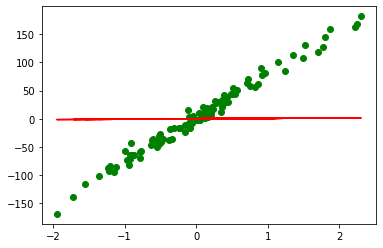

In [ ]:
#visualiser le modele generer aleatoirement
plt.scatter(x,y,c='g')
plt.plot(x,y_p,c='r')
plt.show()

methode de descente de gradient


In [ ]:
def gradient(X,B,Y):
  n=len(Y)
  return (2/n)*((modele(X,B)-Y).T).dot(X)

def descenteGradient(X,B,T,nb_iter=100,learning_rate=0.1):
  for i in range(nb_iter):
    B=B-learning_rate*gradient(X,B,y)
    return B


In [ ]:
beta_esti=descenteGradient(X,np.copy(beta),y)
#beta_estimer=descenteGradient(X,y,beta,learning_rate=0.01, n_iteration=2000)

In [ ]:
beta_esti

array([[12.80572191,  1.02503734]])

In [ ]:
y_p=modele(X,beta_esti)

In [ ]:
plt.scatter(x,y,c='g')
plt.plot(x,y_p,c='r')
plt.show()

NameError: ignored

fonction de cout

In [ ]:
def fonctionCout(Y,X,B):
  n=len(Y)
  terme=(Y-modele(X,B))
  return (1/n)*(terme.T).dot(terme)[0]


In [ ]:
def descenteGradientErreur(X,B,Y,nb_iter=100,learning_rate=0.1):
    erreurs=[]
    for i in range(nb_iter):
      B=B-learning_rate*gradient(X,B,Y)
      err=fonctionCout(Y,X,B)
      erreurs.append(err)
    return B,erreurs

In [ ]:
beta_esti,erreurs=descenteGradientErreur(X,np.copy(beta),y,nb_iter=100,learning_rate=0.1)


In [ ]:
np.shape(erreurs)

(100, 1)

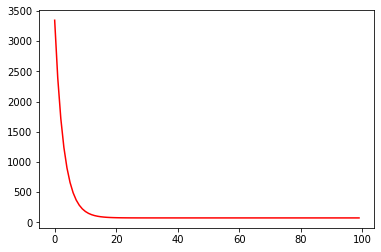

In [ ]:
plt.plot(erreurs,c='r')
plt.show()